In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# XGBoost Model
import xgboost as xgb

# Deep Learning (Neural Network)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [9]:
# Load dataset
file_path = "exercise.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [10]:
# Drop User_ID as it's not useful for prediction
df.drop(columns=['User_ID'], inplace=True)

# Convert 'Gender' into numeric format
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])  # Male = 1, Female = 0

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Normalize numerical data
scaler = StandardScaler()
numerical_cols = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()


Missing values:
 Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,1.484726,1.089582,1.265909,1.619127,0.989404,0.994023,231
1,0,-1.342179,-0.593726,-0.995458,-0.183990,-0.158461,0.352342,66
2,1,1.543620,0.318066,0.268247,-1.265861,-0.784569,-1.701035,26
3,0,-0.517665,0.318066,-0.263839,-0.304198,0.467647,0.609015,71
4,0,-0.929922,-1.435380,-1.128480,-0.664821,-1.515029,-0.289338,35


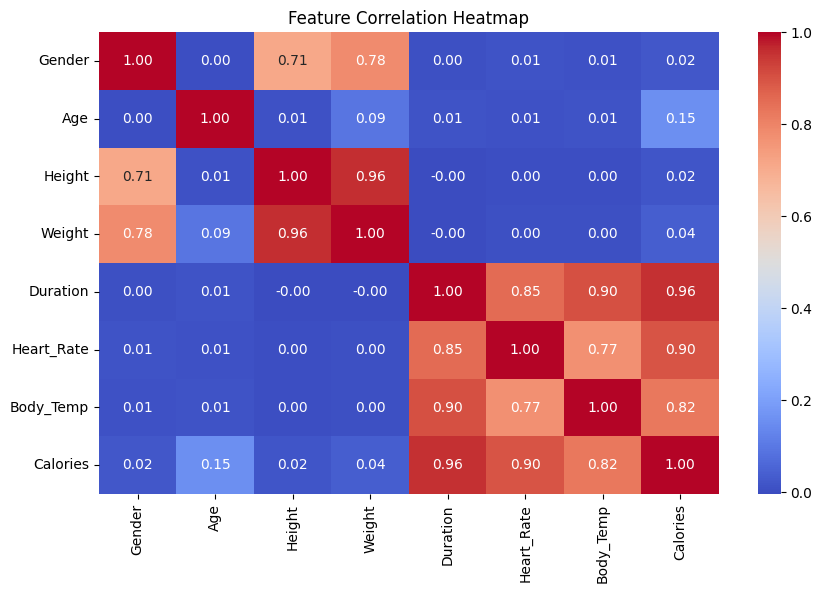

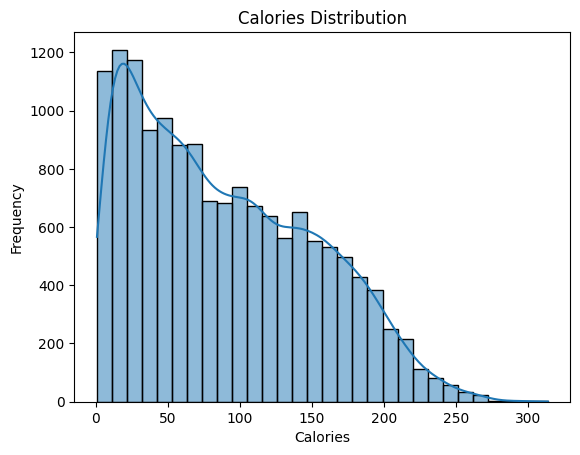

In [11]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of Calories
sns.histplot(df['Calories'], bins=30, kde=True)
plt.title("Calories Distribution")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()


In [12]:
# Define features and target variable
X = df.drop(columns=['Calories'])
y = df['Calories']

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (12000, 7)
Testing Data Shape: (3000, 7)


In [13]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

# Evaluate model
print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))


Linear Regression Performance:
MAE: 8.441513553849708
MSE: 131.99574575081695
R² Score: 0.9672937151257295


In [14]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluate model
print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
MAE: 1.7196333333333331
MSE: 7.179608266666667
R² Score: 0.9982210160492706


In [15]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
print("XGBoost Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R² Score:", r2_score(y_test, y_pred_xgb))


XGBoost Performance:
MAE: 1.2241584062576294
MSE: 3.0672364234924316
R² Score: 0.999239981174469


In [16]:
# Build Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile model
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
nn_model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

# Predict
y_pred_nn = nn_model.predict(X_test)

# Evaluate model
print("Neural Network Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_nn))
print("MSE:", mean_squared_error(y_test, y_pred_nn))
print("R² Score:", r2_score(y_test, y_pred_nn))


C:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2424.0991 - mae: 25.3786 - val_loss: 13.2105 - val_mae: 2.6786
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 11.9940 - mae: 2.4747 - val_loss: 4.3334 - val_mae: 1.4505
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5.1557 - mae: 1.5744 - val_loss: 2.9782 - val_mae: 1.2852
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.8566 - mae: 1.2067 - val_loss: 2.2575 - val_mae: 1.0924
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 2.2126 - mae: 1.1035 - val_loss: 1.5232 - val_mae: 0.9251
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.8025 - mae: 1.0068 - val_loss: 0.8501 - val_mae: 0.6954
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.2948 - mae: 0.8543 - val_loss: 0.8424 - val_mae: 0.7236
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.2379 - mae: 0.8407 - val_loss: 0.5685 - val_mae: 0.5779
Epoch 9/50
1500/1500 ━━━━━━━━━━━━━

C:\Users\Dell\AppData\Local\Temp\ipykernel_15868\729457812.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mae_scores, palette="viridis")


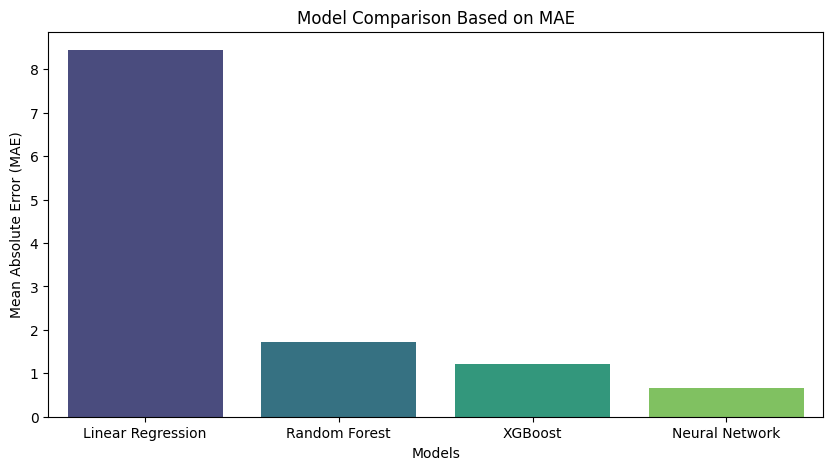

In [17]:
models = ['Linear Regression', 'Random Forest', 'XGBoost', 'Neural Network']
mae_scores = [mean_absolute_error(y_test, y_pred_lr), 
              mean_absolute_error(y_test, y_pred_rf), 
              mean_absolute_error(y_test, y_pred_xgb), 
              mean_absolute_error(y_test, y_pred_nn)]

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=mae_scores, palette="viridis")
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model Comparison Based on MAE")
plt.show()


    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68     190      94        29         105       40.8   
1  14861698  female   20     166      60        14          94       40.3   
2  11179863    male   69     179      79         5          88       38.7   
3  16180408  female   34     179      71        13         100       40.5   
4  17771927  female   27     154      58        10          81       39.8   

   Calories  
0       231  
1        66  
2        26  
3        71  
4        35  


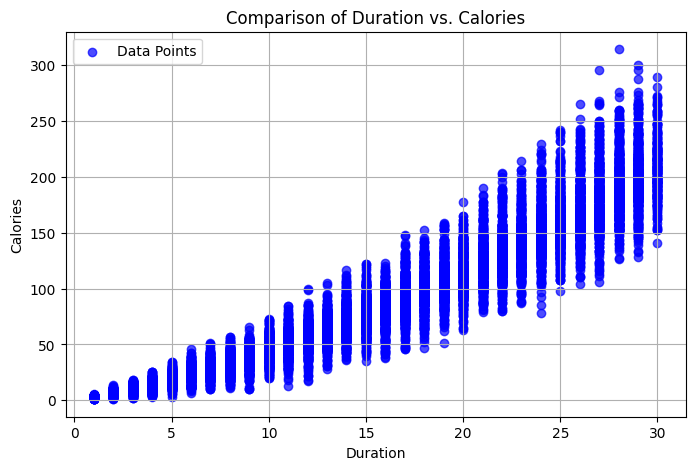

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "exercise.csv"  # Update with your file path if needed
df = pd.read_csv(file_path)

# Display first few rows to check column names
print(df.head())

# Select two columns for comparison (Modify these if needed)
x_column = "Duration"  # Change to a valid column name from your dataset
y_column = "Calories"  # Change to a valid column name from your dataset

# Plot the data
plt.figure(figsize=(8, 5))
plt.scatter(df[x_column], df[y_column], color='blue', alpha=0.7, label='Data Points')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f"Comparison of {x_column} vs. {y_column}")
plt.legend()
plt.grid(True)

# Show the graph
plt.show()


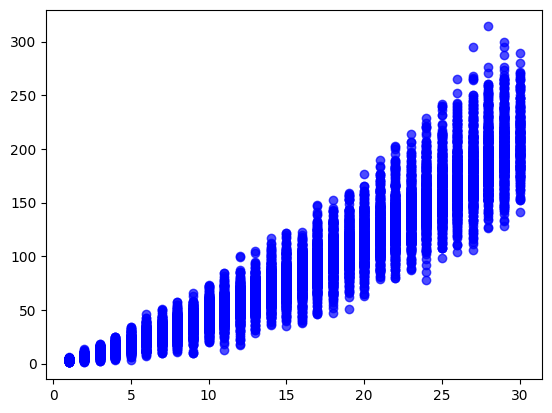

In [25]:
plt.scatter(df[x_column], df[y_column], color='blue', alpha=0.7, label='Data Points')


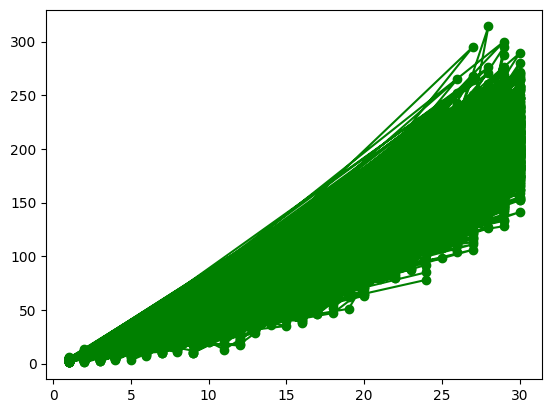

In [26]:
plt.plot(df[x_column], df[y_column], marker='o', linestyle='-', color='green', label='Trend')


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
# Load the dataset
df = pd.read_csv("disease_data.csv")

In [29]:
# Display basic info
display(df.head())


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [30]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

None

In [31]:
display(df.isnull().sum())  # Check for missing values

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [32]:
display(df["Disease"].value_counts())  # Distribution of diseases

Disease
Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: count, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_15868\3911597711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Disease", data=df, palette="coolwarm")


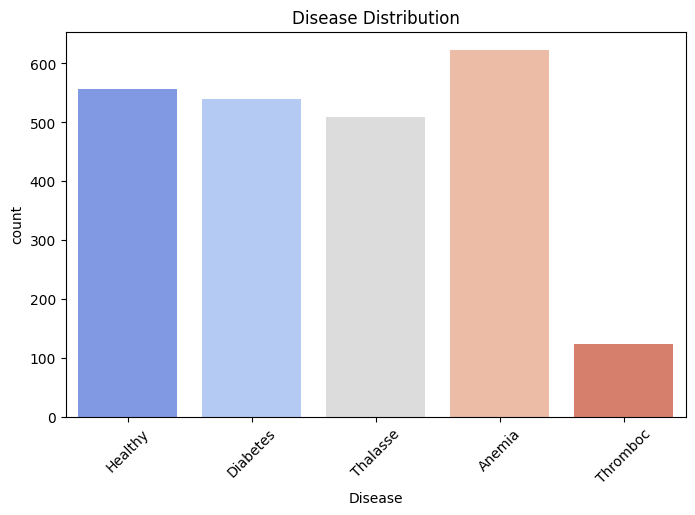

In [33]:
# Visualizing disease distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Disease", data=df, palette="coolwarm")
plt.title("Disease Distribution")
plt.xticks(rotation=45)
plt.show()

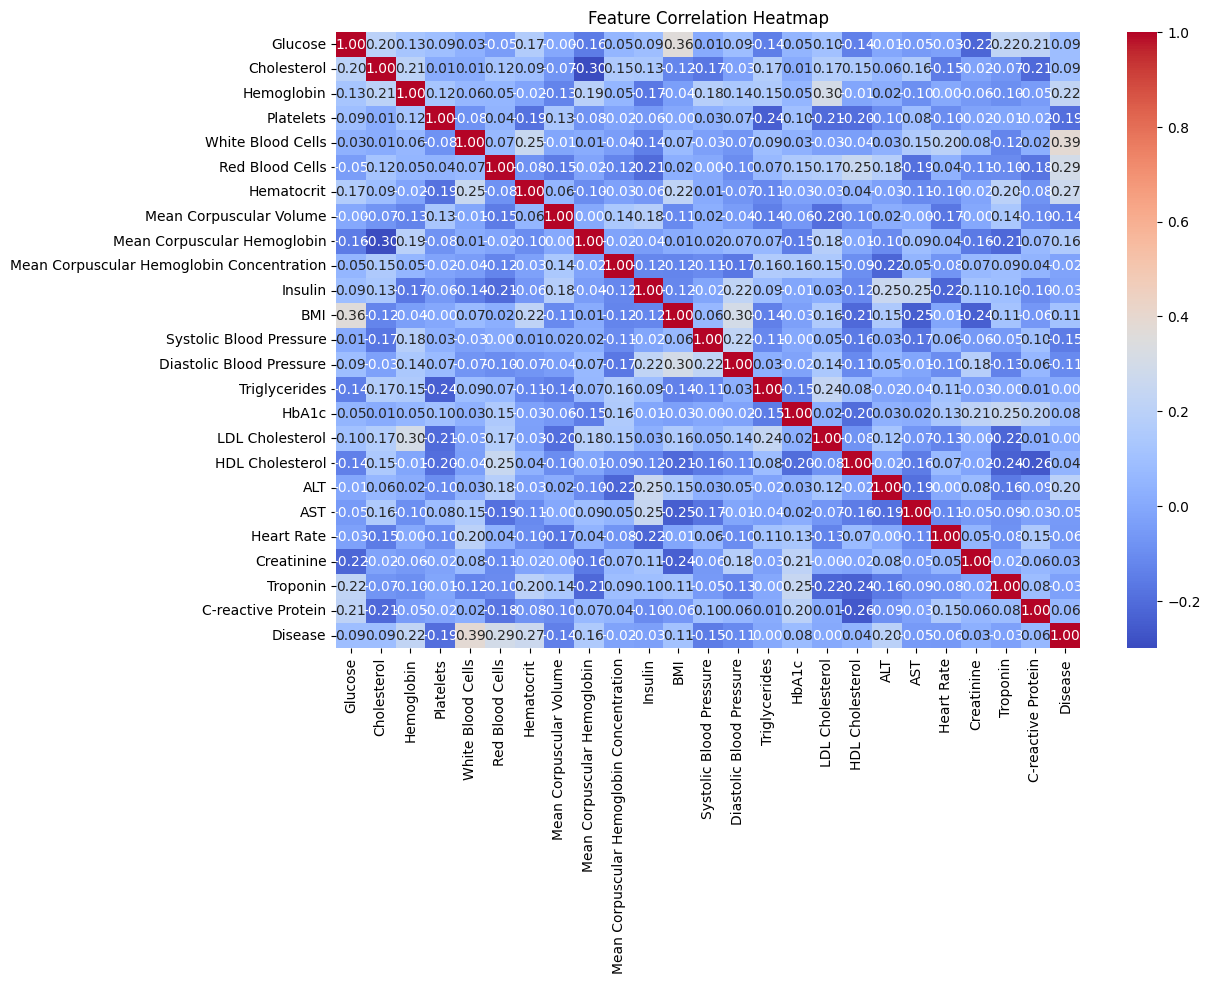

In [41]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [43]:
# Encode target variable
label_encoder = LabelEncoder()
df["Disease"] = label_encoder.fit_transform(df["Disease"])

In [44]:
# Splitting data
X = df.drop("Disease", axis=1)
y = df["Disease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Train models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier(max_iter=500)
}


In [47]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    accuracy = model.score(X_test_scaled, y_test)
    results[name] = accuracy

display(results)

{'Logistic Regression': 1.0,
 'Random Forest': 1.0,
 'SVM': 1.0,
 'Neural Network': 1.0}

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop(columns=['Disease'])  # Assuming 'Disease' is the target column
y = df['Disease']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Now X_scaled is defined

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [50]:
from sklearn.model_selection import cross_val_score

cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cv_results[name] = scores.mean()

# Display results
print(cv_results)


{'Logistic Regression': np.float64(1.0), 'Random Forest': np.float64(1.0), 'SVM': np.float64(1.0), 'Neural Network': np.float64(1.0)}


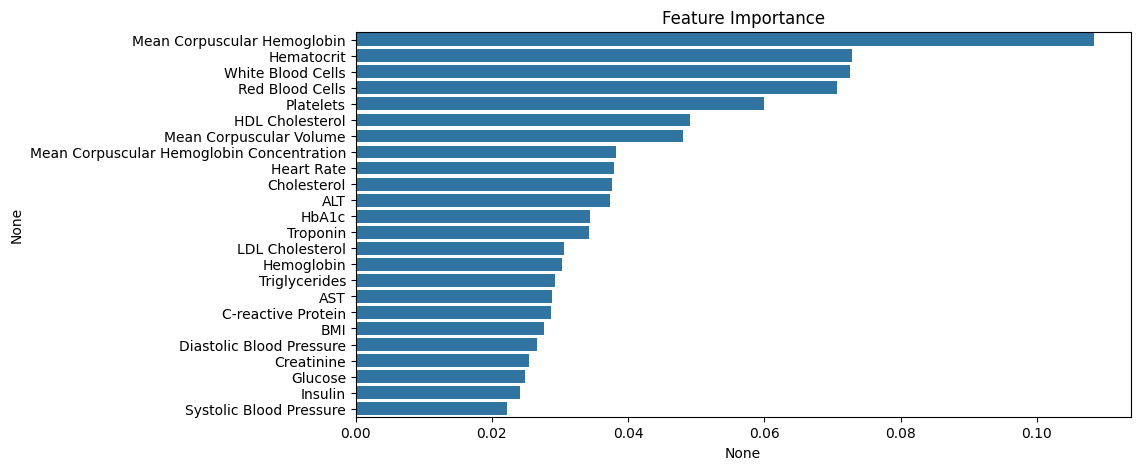

In [51]:
# Feature Importance using RandomForest
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance")
plt.show()

In [52]:
# Confusion Matrix & Classification Report
y_pred = rf.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[134   0   0   0   0]
 [  0 112   0   0   0]
 [  0   0 102   0   0]
 [  0   0   0 103   0]
 [  0   0   0   0  20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       112
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00       103
           4       1.00      1.00      1.00        20

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471

